# House Prices Advanced Regression Techniques

## Seminarski rad na kursu Masinsko ucenje - Matematicki fakultet, Univerzitet u Beogradu
 
### Autor: Denis Alicic
 

## Opis projekta

Cilj je istrenirati regresioni model koji predvidja cenu nekretnine na osvnovu velikog broja atributa. 
Akcenat je na pazljivom preprocesiranju podataka i uocavanju statistickih zakonitosti u podacima iz razloga sto ce to verovatno dati mnogo bolje rezultate i razumevanje finalnog modela.

S obzirom da se radi o ceni nekretnine, pozeljno bi bilo da model ima sto je moguce manji broj atributa (npr. koeficijenata razlicitih od 0 u slucaju linearne regresije), zato sto to omogucava laksu intepretabilnost modela, kao i razumevanja od strane potencijalnog kupca nekretnine koji koristi ovaj model.

Radi se o Kaggle takmicenju, tako da ce finalni model ipak teziti sto boljem rezultatu bez osvrta na broj atributa. Jedan od njih ce biti treniran sa ciljem smanjivanja atributa i nadam se da ce biti podjednako dobar ili ipak neznatno losiji od dosta kompleksnijeg.
U tu svrhu bice koriscena **Lasso regresija i Elastic net regresija**.

### Skup podataka: [link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

### Detaljni opis podataka je dostupan u [fajlu](../Dataset/data_description.txt)

## Preprocesiranje podataka

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import scipy

from scipy.stats import skew
from scipy.special import boxcox1p

In [2]:
# Ucitavanje podataka
train = pd.read_csv("../Dataset/train.csv")
test = pd.read_csv("../Dataset/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Osnovne statistike
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Odmah vidimo da postoji Id, koji nam nece trebati
# Kao i da postoje kolone koje sadrze dosta NaN i 0 vrednosti, pa hajde da to malo istrazimo o cemu se radi
train_ID = train["Id"]
test_ID = test["Id"]
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [7]:
numericki = [f for f in train.columns if train.dtypes[f] != 'object']
kategoricki = [f for f in train.columns if train.dtypes[f] == 'object']

In [8]:
numericki

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97f0e89df0>,
      dtype=object)

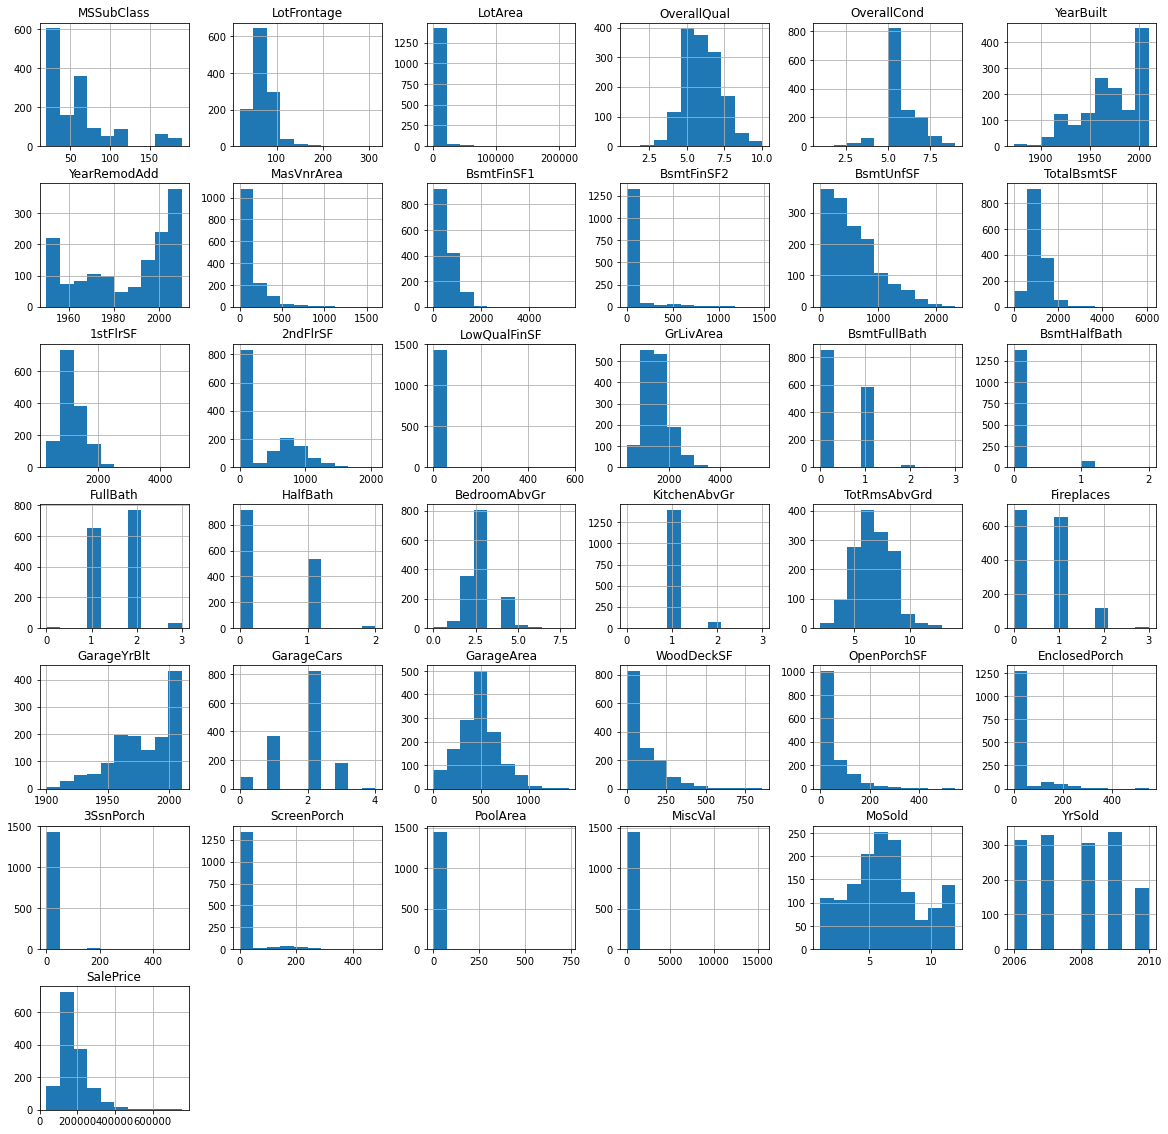

In [9]:
#Skoro ni jedan ne prati normalnu raspodelu, moracemo da vrsimo neke korekcije
train[numericki].hist(figsize=(20, 20))

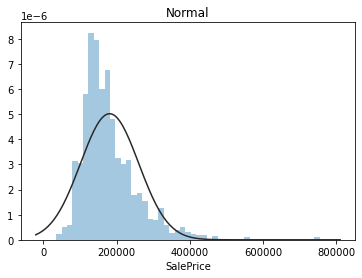

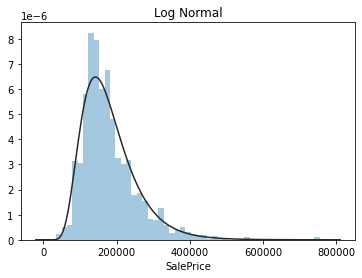

In [10]:
# Analiza ciljne promenljive
y = train['SalePrice']
plt.figure(1); plt.title('Normal')
sb.distplot(y, kde=False, fit=scipy.stats.norm)
plt.figure(2); plt.title('Log Normal')
sb.distplot(y, kde=False, fit=scipy.stats.lognorm)

### Detekcija korelacije i outlajera

Iscrtavanjem grafika zavisnosti atributa od ciljne promenljive mozemo da ucimo 2 stvari. 

1. Da li postoji linearna zavisnost medju njima
2. Detekcija outlajera sa korsicenjem informacije i o ceni. Npr. ukoliko je neki stan bas veliki, analizom samo kvadrature mozemo zakljuciti da je greska u merenju ili zapisu i odbaciti ga. U suportnom ukoliko deluje da je outlajer, ali mu je i cena takodje dosta velika, vrv se ne radi o netacnom podatku i moze nam pruziti dodatne informacije o bas velikim stanovima. takve vrednosti cesto dosta uticu na regresione modele, ali ukoliko su tacni, mogu nam pomoci. Svakako je potrebno ih uzeti u razmatranje.  

<ipython-input-11-e657d85d0d81>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


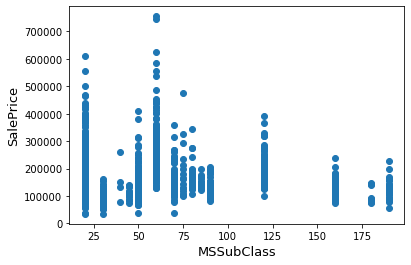

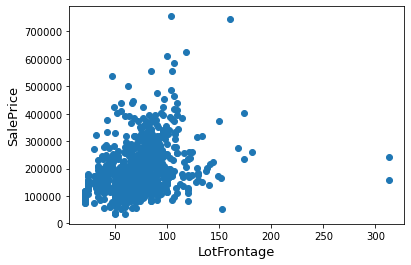

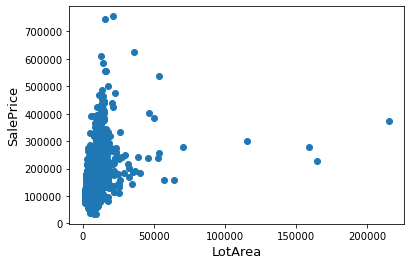

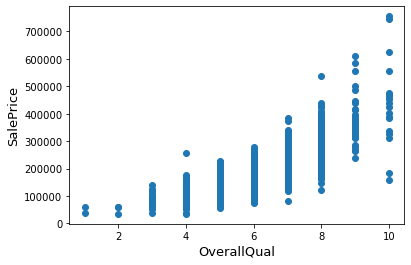

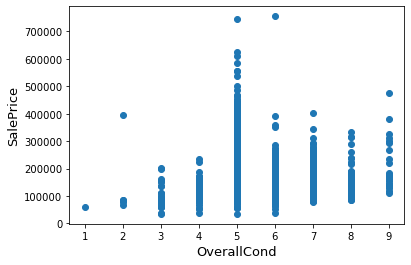

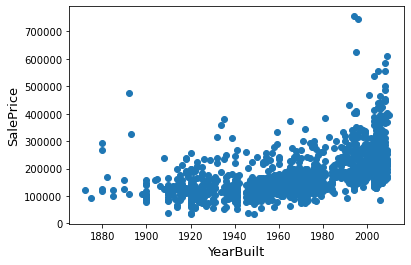

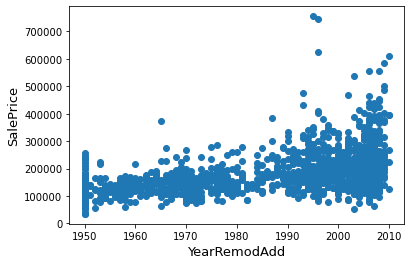

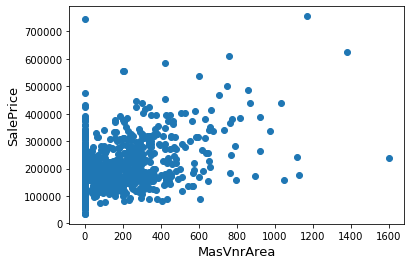

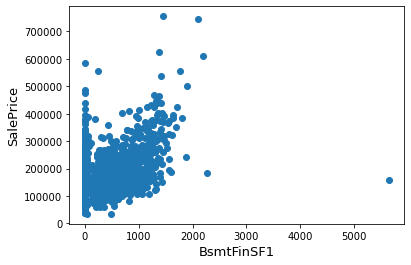

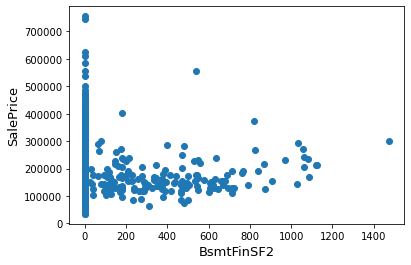

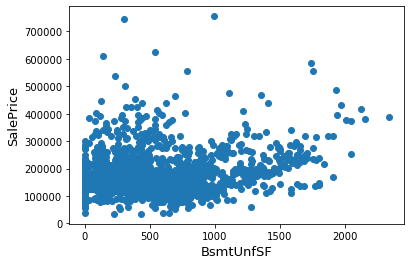

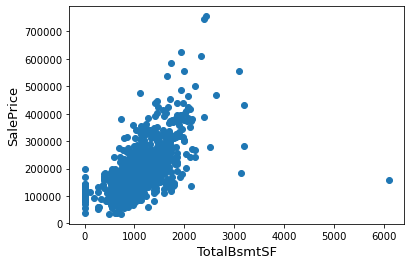

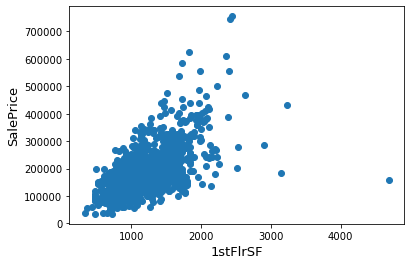

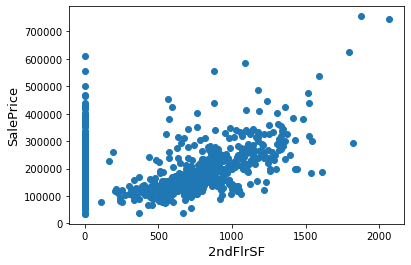

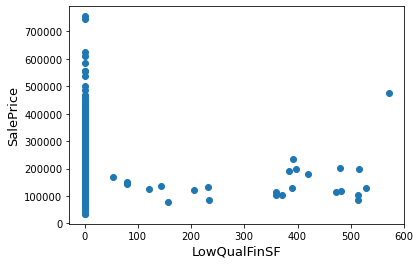

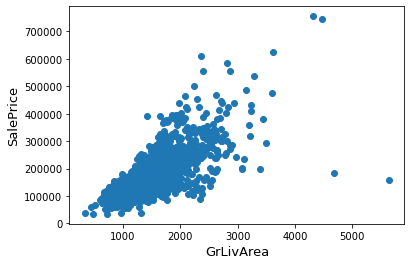

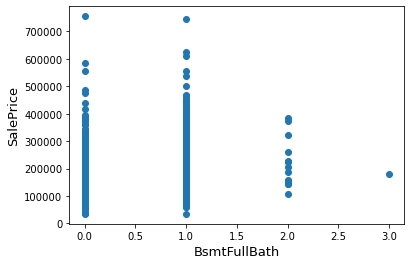

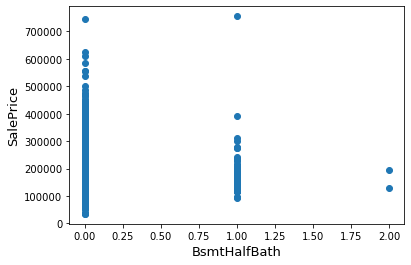

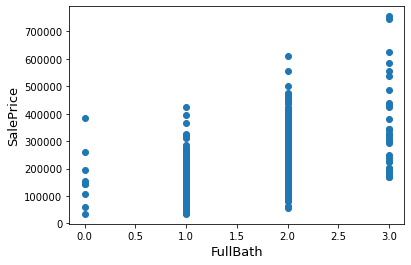

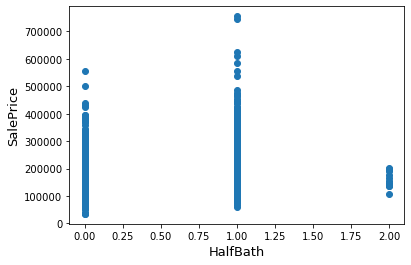

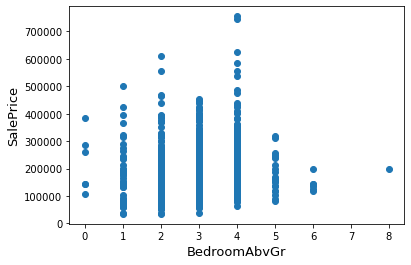

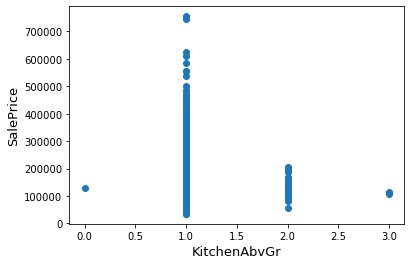

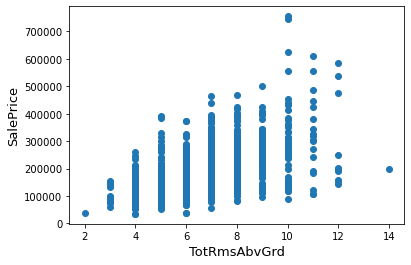

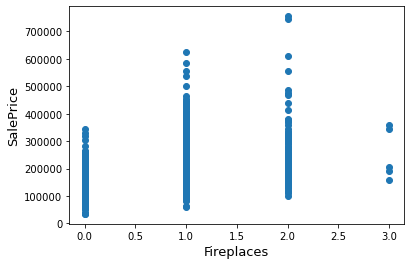

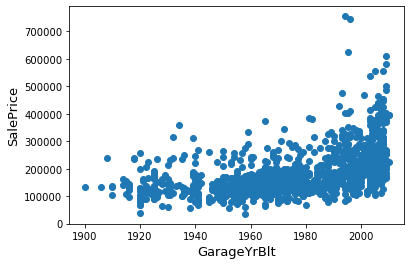

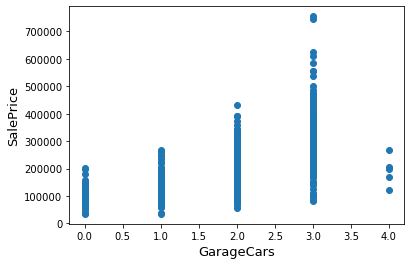

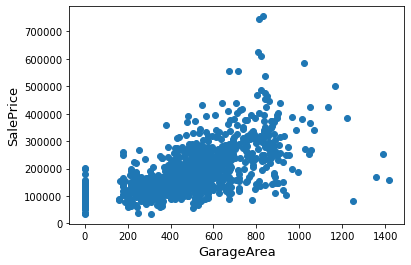

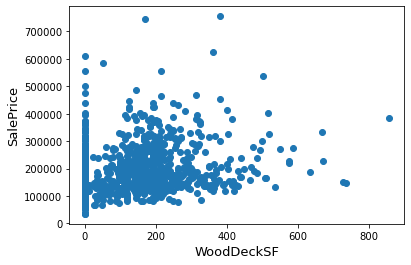

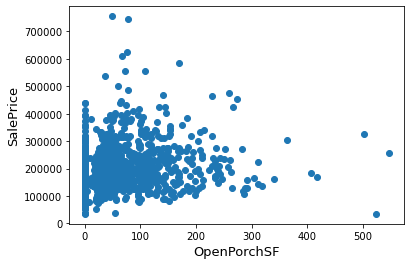

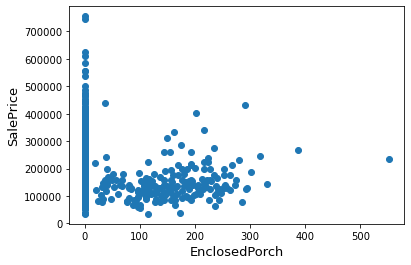

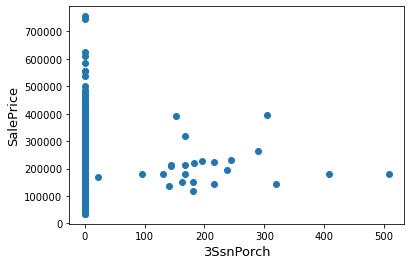

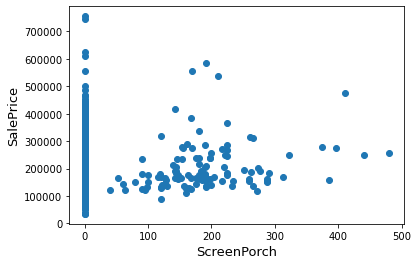

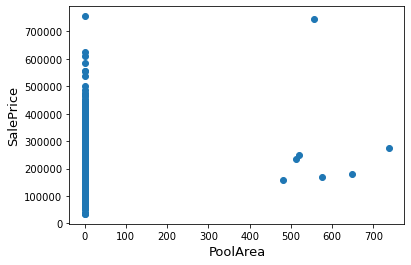

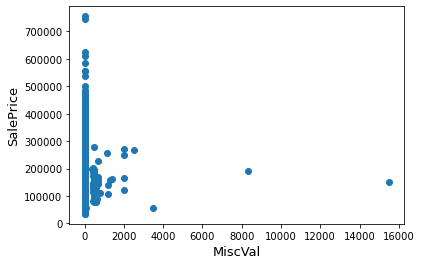

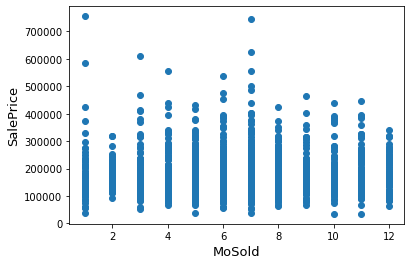

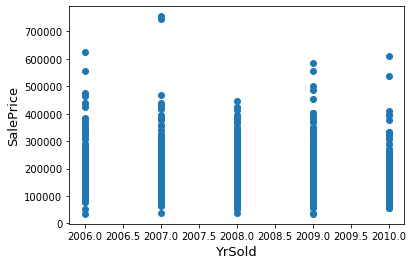

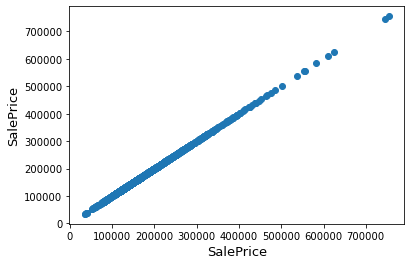

In [11]:
for n in numericki:
    fig, ax = plt.subplots()
    ax.scatter(x = train[n], y = train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(n, fontsize=13)
plt.show()

In [12]:
# Podataka nema mnogo pa cemo ih rucno okloniti i analizirati
print(train.shape)
train = train.drop(train[train['LotFrontage']>300].index)
train = train.drop(train[train['LotArea']>200000].index)
train = train.drop(train[train['BsmtFinSF1']>5000].index)
train = train.drop(train[train['1stFlrSF']>4000].index)
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train = train.drop(train[train['WoodDeckSF']>800].index)
train = train.drop(train[train['EnclosedPorch']>500].index)
train = train.drop(train[train['3SsnPorch']>400].index)
train = train.drop(train[train['MiscVal']>8000].index)
print(train.shape)

(1460, 80)
(1450, 80)


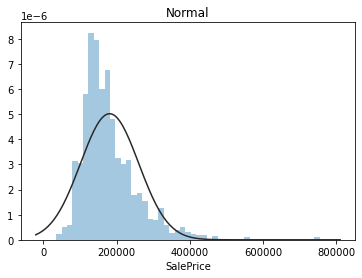

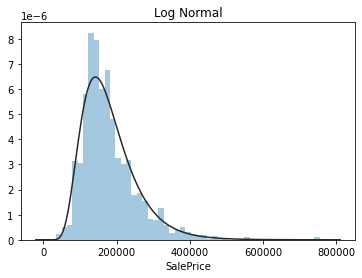

In [13]:
# Analiza ciljne promenljive
plt.figure(2); plt.title('Normal')
sb.distplot(y, kde=False, fit=scipy.stats.norm)
plt.figure(3); plt.title('Log Normal')
sb.distplot(y, kde=False, fit=scipy.stats.lognorm)

Dva su dobra razloga za ovu transformaciju. 

    1. Ocenjivanje tacnosti se i radi nad logaritmom predikcija, bas zato da modeli koji su preprilagodjeni skupim stanovima ne bi "prosli" bolje na takmicenju, pa nam zato odgovara fitovanje na ove vrednosti.
    2. Dobijamo priblizno normalnu raspodelu, pa tako mozemo da racunamo prosek i standardno odstupanje sa prilicnom sigursnoscu koliko smo dobri.

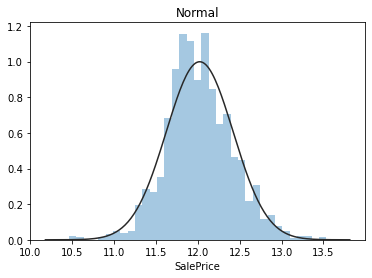

In [14]:
# Korekcija ciljne promenljive log(1+x), nakon predikcije, vraticemo transformaciju
train["SalePrice"] = np.log1p(train["SalePrice"])
plt.title('Normal')
sb.distplot(train['SalePrice'], kde=False, fit=scipy.stats.norm)
# Sada nam ciljna promenljiva ima priblizno normalnu raspodelu

Vidimo da postoje kolone koje su jako korelisane sa ciljnom promenljivom. 
To su kolone:
    
    - OveralQual - generalni kvalitet
    - YearBuilt - godina kada je sagradjeno
    - TotalBsmFt - povrsina
    - GarageArea - velicina garaze
    
Sve to ima smisla i ocekujemo da ti atributi dosta uticu na cenu nekretnine.

Postoje i medjusobno korelisani atributi:
    
    - GarageArea i GarageCars
    - YearBuilt i GarageYrBuilt
    - GarageCars i OvealQual
    - GarageCars i GarageYrBuilt
    
Imamo korlisane atribute i iz tog razloga cemo voditi racuna koje koristimo algoritme (npr. Ridge koja resava problem numericke nestabilnosti klasicne linerane regresije)
Nisu nam ove informacije dalje od mnogoo velike koristi, ali su zanimljive iz aspekta domena. 
Npr. iz poslednje vidimo da je zavistan broj automobila u garazi od godine prozivodnje garaze.

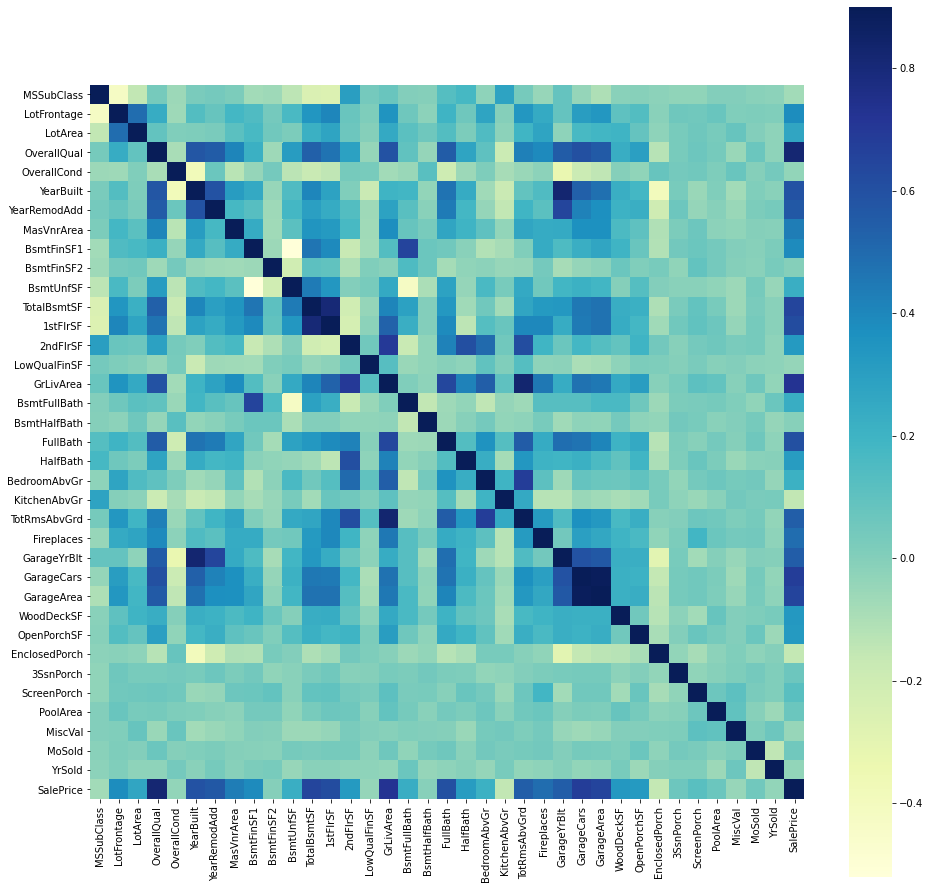

In [15]:
# Sada da vidimo korelacije u matrici
corrmat = train.corr()
plt.subplots(figsize=(16,16))
sb.heatmap(corrmat, vmax=0.9, square=True, cmap='YlGnBu')

### Korekcija tipova

In [16]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

In [17]:
test['MSSubClass'] = test['MSSubClass'].apply(str)
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

## Nedostajuce vrednosti

## Dalje cemo sve statistike i istrazivanja i "ucenja" vrsiti nad train podacima i eventualna skaliranja i odbacivanja raditi nad oba

In [18]:
nd_train = (train.isnull().sum() / len(train)) * 100
nd_train = nd_train.drop(nd_train[nd_train == 0].index).sort_values(ascending=False)
nd_train_pd = pd.DataFrame({'Missing Ratio' :nd_train})
nd_train_pd

,Missing Ratio
PoolQC,99.655172
MiscFeature,96.413793
Alley,93.724138
Fence,80.689655
FireplaceQu,47.448276
LotFrontage,17.724138
GarageYrBlt,5.586207
GarageType,5.586207
GarageFinish,5.586207
GarageQual,5.586207


In [19]:
nd_test = (test.isnull().sum() / len(test)) * 100
nd_test = nd_test.drop(nd_test[nd_test == 0].index).sort_values(ascending=False)
nd_test_pd = pd.DataFrame({'Procenat nedostajucih vrednosti' :nd_test})
nd_test_pd

,Procenat nedostajucih vrednosti
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageYrBlt,5.346127
GarageCond,5.346127
GarageQual,5.346127
GarageFinish,5.346127


Text(0.5, 1.0, 'Procenat nedostajucih vrednosti po atributu')

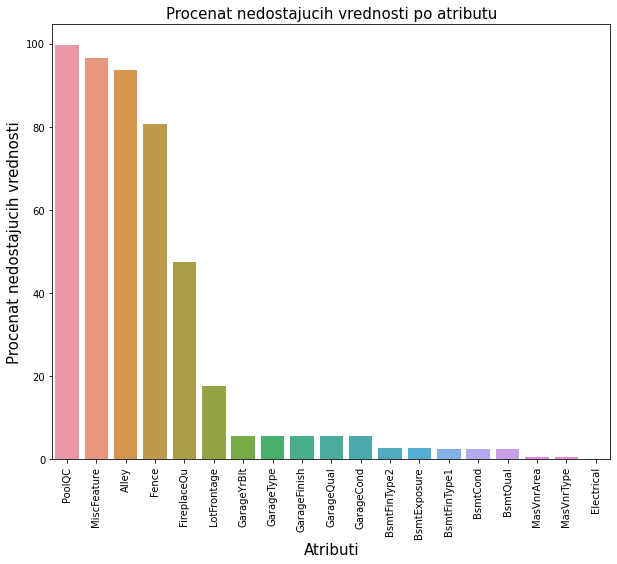

In [20]:
f, ax = plt.subplots(figsize=(10,8))
plt.xticks(rotation='90')
sb.barplot(x=nd_train.index, y=nd_train)
plt.xlabel('Atributi', fontsize=15)
plt.ylabel('Procenat nedostajucih vrednosti', fontsize=15)
plt.title('Procenat nedostajucih vrednosti po atributu', fontsize=15)

- U vecini kategorickih kolona NaN (nedostajuce vrednost) verovatno znaci da taj atribut ne postoji, na primer bazen

- Kod numerickih obicno NaN obicno znaci da ih ima 0

Ipak postoje izuzeci, pa cemo onda te podatke menjati **srednjom vrednoscu ili najcescom klasom u zavisnosti od tipa atributa.**

In [21]:
train["PoolQC"] = train["PoolQC"].fillna("None")
test["PoolQC"] = test["PoolQC"].fillna("None")

train["MiscFeature"] = train["MiscFeature"].fillna("None")
test['MiscFeature'] = test["MiscFeature"].fillna("None")

train["Alley"] = train["Alley"].fillna("None")
test["Alley"] = test["Alley"].fillna("None")

train["Fence"] = train["Fence"].fillna("None")
test["Fence"] = test["Fence"].fillna("None")

train["FireplaceQu"] = train["FireplaceQu"].fillna("None")
test["FireplaceQu"] = test["FireplaceQu"].fillna("None")

- Za numericke podatke, popunjavacemo nedostajuce podatke sa srednjom vrednoscu, ali ne svih podataka nego cemo u zavisnosti od atributa deliti u manje grupe po nekom kriterujumu i onda traziti srednju vrednost

- Za kategoricke cemo raditi slicno, s tim sto cemo uzimati najcescu vrednost za svaku grupu

In [22]:
# Otprilike 50% vremena na ovu funkciju da se izvede kako treba
def imput_mean_data(group_by_column, target_column):
    x = train.groupby(group_by_column)[target_column].mean()
    for (col, mean) in zip(x.index, x):
        train.loc[train[group_by_column] == col, target_column] = train.loc[train[group_by_column] == col, target_column].fillna(mean)
        test.loc[test[group_by_column] == col, target_column] = test.loc[test[group_by_column] == col, target_column].fillna(mean) 
    

LotFrontage - Linear Feet of Street property je numericka vrednost, tako da cemo pounjavati srednjom vrednoscu.
Grupisanje radimo po susedstvu, jer pretpostavljamo da su u jednom naselju (radi se o Americi) slican tip kuca i objekata, pa je duzina do ulice slicna.

In [23]:
imput_mean_data("Neighborhood", "LotFrontage")

In [24]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')
    
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)

In [25]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

In [26]:
train["MasVnrType"] = train["MasVnrType"].fillna("None")
test["MasVnrType"] = test["MasVnrType"].fillna("None")

train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

In [27]:
def imput_mode_data(group_by_column, target_column):
    x = train.groupby(group_by_column)[target_column].agg(lambda x:x.value_counts().index[0])
    for (col, mode) in zip(x.index, x):
        train.loc[train[group_by_column] == col, target_column] = train.loc[train[group_by_column] == col, target_column].fillna(mode[0])
        test.loc[test[group_by_column] == col, target_column] = test.loc[test[group_by_column] == col, target_column].fillna(mode[0]) 
    

Zonu stana (selo, insdustrijska zona....)(MsZoning) ne moze biti nista, tako da to moramo popuniti necim.
Grupisacemo po klasi (da li je duplex, prizemna kuca...) pa cemo po tome uzeti najcescu zonu, opet vodeci se logikom da su slicne kuce u jednoj zoni.

In [28]:
imput_mode_data("MSSubClass", "MSZoning")

In [29]:
train["Functional"] = train["Functional"].fillna("Typ")
test["Functional"] = test["Functional"].fillna("Typ")

Slicna logika za tip struje

In [30]:
imput_mode_data("Neighborhood", "Electrical")

In [31]:
test['Utilities'] = test['Utilities'].fillna(train['Utilities'].mode()[0])

In [32]:
test['KitchenQual'] = test['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

In [33]:
test['Exterior1st'] = test['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(train['SaleType'].mode()[0])

In [34]:
# Provera za train i test
nd_train = (train.isnull().sum() / len(train)) * 100
nd_train = nd_train.drop(nd_train[nd_train == 0].index).sort_values(ascending=False)
nd_train_pd = pd.DataFrame({'Procenat nedostajucih' :nd_train})
nd_train_pd

,Procenat nedostajucih


In [35]:
nd_test = (test.isnull().sum() / len(test)) * 100
nd_test = nd_test.drop(nd_test[nd_test == 0].index).sort_values(ascending=False)
nd_test_pd = pd.DataFrame({'Procenat nedostajucih' :nd_test})
nd_test_pd

,Procenat nedostajucih


### Nakrivljeni (skew) atributi

Generalna ideja "ispravljanja atributa" je da sve vrednosti manje-vise podjednako uticu i da bismo imali linearnu dobili priblizno normalnu raspodelu koja nam moze pomoci u oceni greske i generalno pri treniranju modela jer mnoge prepostavke modela ukljucuju normalno raspodelu. 

In [36]:
numeric_feats = train.dtypes[train.dtypes != "object"].index.drop("SalePrice")

# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nNakrivljenost na numerickim podacima: \n")
skewness = pd.DataFrame({'Nakrivljenost' :skewed_feats})
skewness.head(10)


Nakrivljenost na numerickim podacima: 



,Nakrivljenost
PoolArea,17.372247
LotArea,11.179546
MiscVal,10.461874
3SsnPorch,9.249004
LowQualFinSF,9.236404
KitchenAbvGr,4.506375
BsmtFinSF2,4.280457
BsmtHalfBath,4.114759
ScreenPorch,4.101514
EnclosedPorch,2.874460


In [37]:
skewness = skewness[abs(skewness) > 0.75]

skewed_features = skewness.index
train[skewed_features] = np.log1p(train[skewed_features])
test[skewed_features] = np.log1p(test[skewed_features])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97ec836f70>,
      dtype=object)

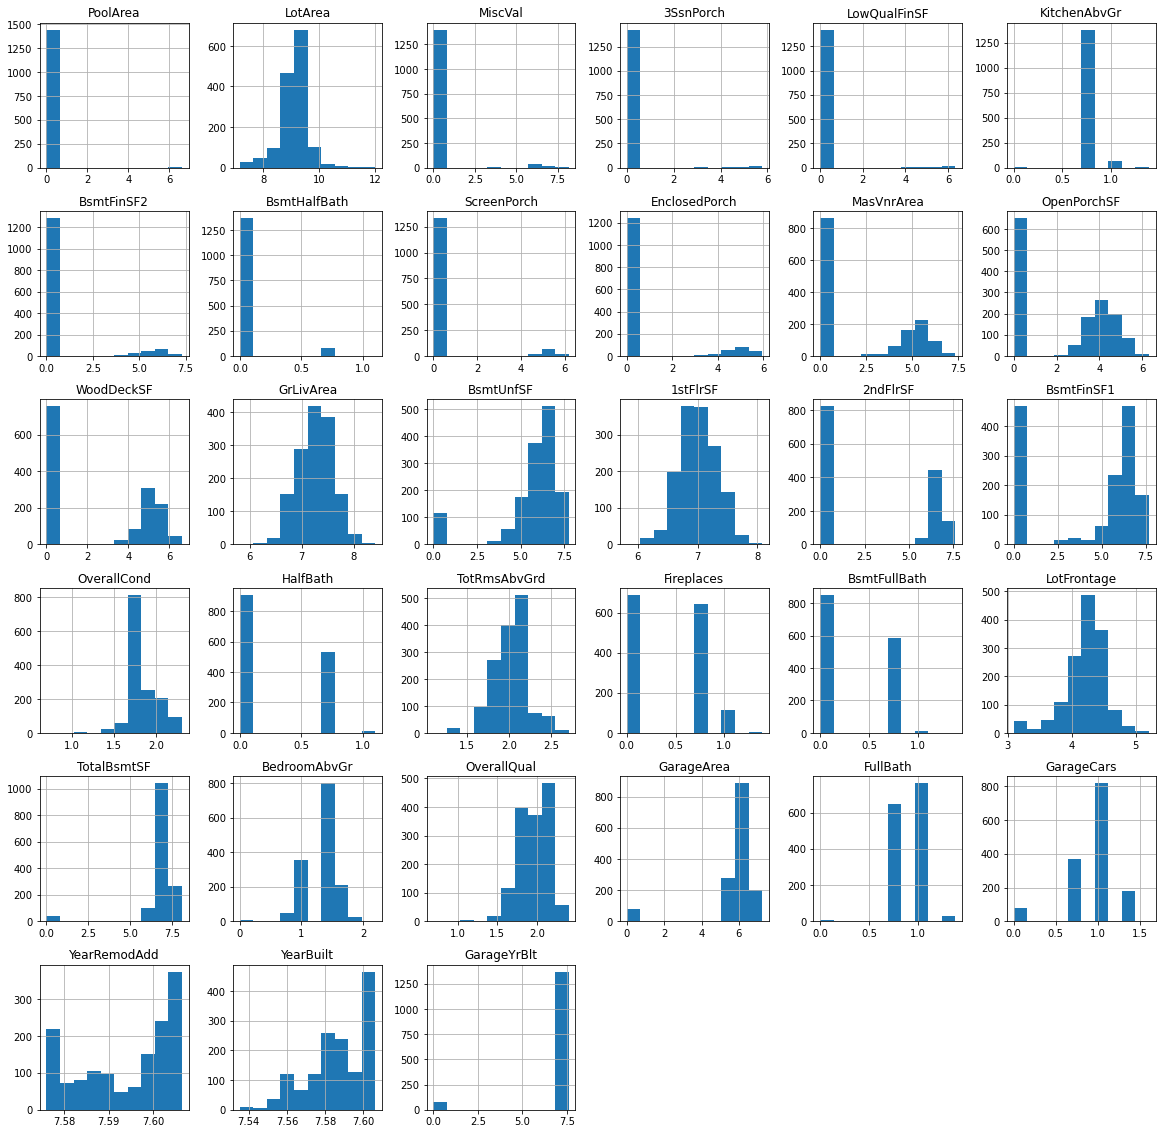

In [38]:
train[skewed_features].hist(figsize=(20, 20))

### Feature engineering

In [39]:
y = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

In [40]:
train_features = train_features.drop(['Utilities', 'Street', 'PoolQC', 'GarageCars'], axis=1)

train_features['YrBltAndRemod']=train_features['YearBuilt']+train_features['YearRemodAdd']
train_features['TotalSF']=train_features['TotalBsmtSF'] + train_features['1stFlrSF'] + train_features['2ndFlrSF']

train_features['Total_sqr_footage'] = (train_features['BsmtFinSF1'] + train_features['BsmtFinSF2'] +
                                 train_features['1stFlrSF'] + train_features['2ndFlrSF'])

train_features['Total_Bathrooms'] = (train_features['FullBath'] + (0.5 * train_features['HalfBath']) +
                               train_features['BsmtFullBath'] + (0.5 * train_features['BsmtHalfBath']))

train_features['Total_porch_sf'] = (train_features['OpenPorchSF'] + train_features['3SsnPorch'] +
                              train_features['EnclosedPorch'] + train_features['ScreenPorch'] +
                              train_features['WoodDeckSF'])

In [41]:
test_features = test_features.drop(['Utilities', 'Street', 'PoolQC', 'GarageCars'], axis=1)

test_features['YrBltAndRemod']=test_features['YearBuilt']+test_features['YearRemodAdd']
test_features['TotalSF']=test_features['TotalBsmtSF'] + test_features['1stFlrSF'] + test_features['2ndFlrSF']

test_features['Total_sqr_footage'] = (test_features['BsmtFinSF1'] + test_features['BsmtFinSF2'] +
                                 test_features['1stFlrSF'] + test_features['2ndFlrSF'])

test_features['Total_Bathrooms'] = (test_features['FullBath'] + (0.5 * test_features['HalfBath']) +
                               test_features['BsmtFullBath'] + (0.5 * test_features['BsmtHalfBath']))

test_features['Total_porch_sf'] = (test_features['OpenPorchSF'] + test_features['3SsnPorch'] +
                              test_features['EnclosedPorch'] + test_features['ScreenPorch'] +
                              test_features['WoodDeckSF'])

Dodavanje jednostavnijih binarnih atributa, da bi se ubrzalo treniranje modela bazirano na stablima

In [42]:
train_features['haspool'] = train_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_features['has2ndfloor'] = train_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train_features['hasgarage'] = train_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train_features['hasbsmt'] = train_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train_features['hasfireplace'] = train_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [43]:
test_features['haspool'] = test_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test_features['has2ndfloor'] = test_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test_features['hasgarage'] = test_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test_features['hasbsmt'] = test_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test_features['hasfireplace'] = test_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [44]:
train_features.shape

(1450, 85)

In [45]:
test_features.shape

(1459, 85)

In [46]:
nd_test = (test.isnull().sum() / len(test)) * 100
nd_test = nd_test.drop(nd_test[nd_test == 0].index).sort_values(ascending=False)
nd_test_pd = pd.DataFrame({'Procenat nedostajucih' :nd_test})
nd_test_pd

,Procenat nedostajucih


In [47]:
final_train_features = pd.get_dummies(train_features).reset_index(drop=True)
final_train_features.shape

(1450, 330)

In [48]:
final_test_features = pd.get_dummies(test_features).reset_index(drop=True)
final_test_features.shape

(1459, 318)

In [49]:
missing_cols = set( final_train_features.columns ) - set( final_test_features.columns )
print(missing_cols)

for c in missing_cols:
    final_test_features[c] = 0

final_test_features = final_test_features[final_train_features.columns]

{'Condition2_RRNn', 'Heating_Floor', 'Exterior1st_ImStucc', 'RoofMatl_Membran', 'Exterior1st_Stone', 'Electrical_S', 'Exterior2nd_Other', 'RoofMatl_Roll', 'RoofMatl_Metal', 'HouseStyle_2.5Fin', 'Heating_OthW', 'Electrical_Mix', 'MiscFeature_TenC', 'GarageQual_Ex', 'Condition2_RRAn'}


In [50]:
final_test_features.shape

(1459, 330)

## Modeli

In [51]:
from sklearn import linear_model
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import mean_squared_error

In [52]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=final_train_features):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [53]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [54]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

Koriscenje "huber" funkcije gubitka zbog manjeg uticaja potencijalnih outlajera na regresiju

In [55]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)     

Uzeti su neki poznati paramteri, probano je nekoliko

In [56]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [57]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [58]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [59]:
#score = cv_rmse(ridge)
#score = cv_rmse(lasso)
#print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

#score = cv_rmse(elasticnet)
#print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

#score = cv_rmse(svr)
#print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

#score = cv_rmse(lightgbm)
#print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

#score = cv_rmse(gbr)
#print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

#score = cv_rmse(xgboost)
#print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [60]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(final_train_features), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(final_train_features, y)

print('Lasso')
lasso_model_full_data = lasso.fit(final_train_features, y)

print('Ridge')
ridge_model_full_data = ridge.fit(final_train_features, y)

print('Svr')
svr_model_full_data = svr.fit(final_train_features, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(final_train_features, y)

START Fit
stack_gen
[00:09:43] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:09] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:09] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:35] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:35] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[00:11:01] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[00:11:01] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[00:11:26] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[00:11:26] WARNING: ../src/o

In [61]:
print('final_train_featuresgboost')
xgb_model_full_data = xgboost.fit(final_train_features, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(final_train_features, y)

final_train_featuresgboost
[00:14:36] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[00:15:08] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
lightgbm


### Uprosecavanje predikcija
Standardna tehnika za problem regresije, dacemo vise znacajnosti stack modelu

In [74]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [63]:
#print('RMSLE score on train data:')
#print(rmsle(y, blend_models_predict(final_train_features)))

In [75]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = blend_models_predict((final_test_features))
submission.to_csv('final_bias_correction.csv',index=False)

In [76]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = np.exp(lasso_model_full_data.predict(final_test_features)) * np.exp((np.std(y)**2)/2) -1
submission.to_csv('ridge_bias_correction.csv',index=False)

In [77]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = np.expm1(lasso_model_full_data.predict(final_test_features))
submission.to_csv('ridge.csv',index=False)

### Analiza modela

Na osnovu rangiranja ma takmicenju, ne bih dirao model, ovo je najbolje konfiguracija koju sam uspeo da dobijem.
Svakako, vredi analizirati koji atributi su anulirani lasso i elasticnet regresijom i eventualno odluciti nesto povodom toga.

Broj iskoriscenih atributa

In [67]:
import shap

In [68]:
shap.initjs()
explainer = shap.LinearExplainer(ridge_model_full_data[1], final_train_features, feature_perturbation="interventional")
shap_values = explainer.shap_values(final_test_features)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], final_test_features.iloc[0,:])

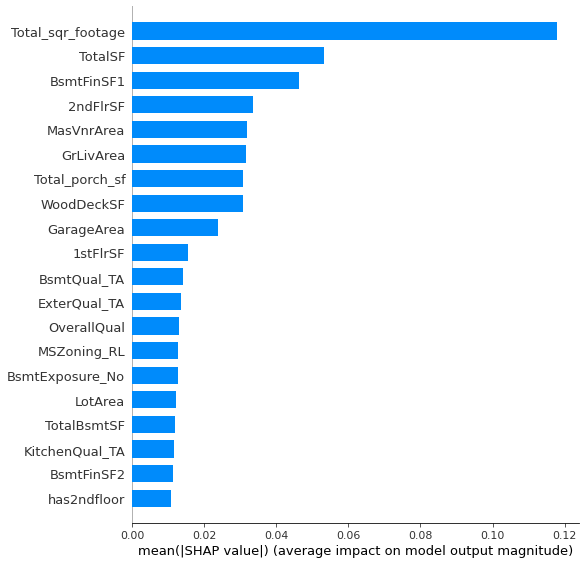

In [69]:
shap.summary_plot(shap_values, final_train_features, plot_type='bar')

Zanimljivo je da su najbitniji **Total_sqr_footage, TotalSF** koje smo dodali kao dodatni atribut